# Home task : KNN classification
1. `iris` dataset
    - load `iris` dataset
    - split to train and test
    - train KNN classifiers for different `K`
    - choose the best `K` determined on test set

2. synthetic dataset
    - generrate synthetic dataset
    - split to train and test
    - train KNN regressors for different `K`
    - choose the best `K` determined on test set
    - visualize the decision boundary 




## `Iris` dataset 

In [60]:
import pandas as pd 
import numpy as np 
np.random.seed = 2021
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def normalize(X_train, X_test):
        scaler = MinMaxScaler()
        X_train_scaled= scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled  = normalize(X_train, X_test)

test_array = np.array([])

for i in range (2, 80):
    knn = KNeighborsClassifier(n_neighbors = i)
    
    knn.fit(X_train_scaled, y_train)
    knn_score = knn.score(X_test_scaled, y_test)
    test_array = np.append(test_array, knn_score)
#     print(f'k = { i }, score = { knn_score }')

In [62]:
score_best = np.amax(test_array)
k_best = int(np.where(test_array == score_best)[0] + 2)
print (f'The best k = { k_best } , score = { score_best }')


The best k = 24 , score = 1.0


## Synthetic dataset  

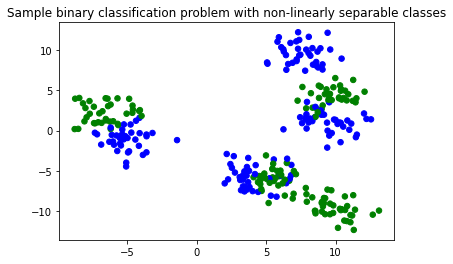

In [63]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)



In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

def normalize(X_train, X_test):
        scaler = MinMaxScaler()
        X_train_scaled= scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled  = normalize(X_train, X_test)

test_array = np.array([])

for i in range (1, 50):
    knn = KNeighborsClassifier(n_neighbors = i)
    
    knn.fit(X_train_scaled, y_train)
    knn_score = knn.score(X_test_scaled, y_test)
    test_array = np.append(test_array, knn_score)
#     print(f'k = { i }, score = { knn.score(X_test_scaled, y_test) }')

In [65]:
score_best = np.amax(test_array)
k_best = np.where(test_array == score_best)[0] + 1
print (f'The best k = { k_best } , score = { score_best }')

The best k = [18 25 26 35 43] , score = 0.9466666666666667
